In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
video_games = pd.read_csv("C:\\Users\\Jordan\\OneDrive\\Desktop\\New folder\\archive\\games.csv")
video_games.shape
video_games.head

<bound method NDFrame.head of       Unnamed: 0                                    Title  Release Date  \
0              0                               Elden Ring  Feb 25, 2022   
1              1                                    Hades  Dec 10, 2019   
2              2  The Legend of Zelda: Breath of the Wild  Mar 03, 2017   
3              3                                Undertale  Sep 15, 2015   
4              4                            Hollow Knight  Feb 24, 2017   
...          ...                                      ...           ...   
1507        1507             Back to the Future: The Game  Dec 22, 2010   
1508        1508                        Team Sonic Racing  May 21, 2019   
1509        1509                           Dragon's Dogma  May 22, 2012   
1510        1510                          Baldur's Gate 3  Oct 06, 2020   
1511        1511                 The LEGO Movie Videogame  Feb 04, 2014   

                                                   Team  Rating Times

In [2]:
video_games.columns

Index(['Unnamed: 0', 'Title', 'Release Date', 'Team', 'Rating', 'Times Listed',
       'Number of Reviews', 'Genres', 'Summary', 'Reviews', 'Plays', 'Playing',
       'Backlogs', 'Wishlist'],
      dtype='object')

### Column descriptions:
* **Unnamed** - unique ID  for each game in the dataset
* **Title** - title of the game
* **Release** - release date of the game [Month, date, year]
* **Team** - publisher of the game e.g. Nintendo
* **Rating** - Average rating out of 5 for the game
* **Times listed** - Number of users on Backloggd who have listed this game (added to a list of games with particular themes or collections)
    * Think of it like a playlist for the game
* **Number of reviews** - How many reivews have been posted for this game
* **Genres** - Genres the game comes under
    * e.g. Action, Platformer, RPG, etc.
* **Plays** - Number of users who have played this game (finshed)
* **Playing** - number of users who are currently playing this game (not finished)
* **Backlogs** - Those who can play the game but haven't started yet
* **Wishlist** - Those who wish to play the game by cannot yet.
* **Reviews** - A user review of the game 
* **Summary** - A summary of the game

Whilst inspecting the dataset we found that the reviews and summary columns were irrelevant and difficult to work with given the questions we chose to investigate as a part of our analysis. They are both too text heavy and also their are multiple entries written in foreign languages.

In [3]:
video_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1512 non-null   int64  
 1   Title              1512 non-null   object 
 2   Release Date       1512 non-null   object 
 3   Team               1511 non-null   object 
 4   Rating             1499 non-null   float64
 5   Times Listed       1512 non-null   object 
 6   Number of Reviews  1512 non-null   object 
 7   Genres             1512 non-null   object 
 8   Summary            1511 non-null   object 
 9   Reviews            1512 non-null   object 
 10  Plays              1512 non-null   object 
 11  Playing            1512 non-null   object 
 12  Backlogs           1512 non-null   object 
 13  Wishlist           1512 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 165.5+ KB


In [4]:
shape = video_games.shape
print(f'The current shape of the dataset is {shape} (rows, columns)')

The current shape of the dataset is (1512, 14) (rows, columns)


14 columns
* 12 object datatype 
* 1 float datatype (Ratings)
* 1 int datatype (Index column)

We identify an issues with our data which is that a majority of the object columns contain data which represents numbers in the 1000s as using decimal and K e.g. 4700 is 4.7K thus we worked a solution to converting these data types later on in our analysis.

When looking at the dataset in its CSV File form it seemed that two of the columns appeared to carry identical values. This was also mentioned in the comments for the data set on Kaggle. These were "Times Listed" and "Number of Reviews" I wrote a function below that uses the `.equals()` paired with an `if statement` to verify if this observation is correct

In [5]:
def check_equal_values(df, column1, column2): 
        if df[column1].equals(df[column2]):
            print(f'{column1} and {column2} have the same values')
        else:
            print(f'{column1} and {column2} do not have the same values')

check_equal_values(video_games, 'Times Listed', 'Number of Reviews')
check_equal_values(video_games, 'Times Listed', 'Title')
#I ran the function twice to confirm that code was working as intended.

Times Listed and Number of Reviews have the same values
Times Listed and Title do not have the same values


A conclusion we potentially made from this result is that a user may have to write a review for a game before they can list the game.

In [3]:
dfvg_1 = video_games.drop(columns=['Unnamed: 0', 'Summary', 'Reviews', 'Times Listed'])
dfvg_1.shape
dfvg_1.head

<bound method NDFrame.head of                                         Title  Release Date  \
0                                  Elden Ring  Feb 25, 2022   
1                                       Hades  Dec 10, 2019   
2     The Legend of Zelda: Breath of the Wild  Mar 03, 2017   
3                                   Undertale  Sep 15, 2015   
4                               Hollow Knight  Feb 24, 2017   
...                                       ...           ...   
1507             Back to the Future: The Game  Dec 22, 2010   
1508                        Team Sonic Racing  May 21, 2019   
1509                           Dragon's Dogma  May 22, 2012   
1510                          Baldur's Gate 3  Oct 06, 2020   
1511                 The LEGO Movie Videogame  Feb 04, 2014   

                                                   Team  Rating  \
0        ['Bandai Namco Entertainment', 'FromSoftware']     4.5   
1                                  ['Supergiant Games']     4.3   
2     ['Nint

We then dropped the columns discussed earlier as being irrelevant to our analysis.

* Summary and Reviews are text entries describing and reviewing a game, sometimes the entries are written in different languages, contain spelling mistakes, profanities and vary too greatly in length and detail to derive in any consistent detail from. As we didn't decide to persue any text analysis we ultimately decided to drop these columns

* We also dropped the unnamed column as it wasn't serving any purpose either


In [7]:
#checking for empty values
empty_values = (dfvg_1 == ' ').sum()
print('The following columns contain empty values:')
print(f'\n{empty_values}')

The following columns contain empty values:

Title                0
Release Date         0
Team                 0
Rating               0
Times Listed         0
Number of Reviews    0
Genres               0
Plays                0
Playing              0
Backlogs             0
Wishlist             0
dtype: int64


In [8]:
#checking for NaN values
na_values = dfvg_1.isna().sum()
print('The following columns contain NaN values:')
print(f'\n{na_values}')

The following columns contain NaN values:

Title                 0
Release Date          0
Team                  1
Rating               13
Times Listed          0
Number of Reviews     0
Genres                0
Plays                 0
Playing               0
Backlogs              0
Wishlist              0
dtype: int64


In [4]:
#checking for duplicated values
dupes = dfvg_1[dfvg_1.duplicated()]
print(f'The following columns are classed as duplicate entries {dupes}')

The following columns are classed as duplicate entries                                         Title  Release Date  \
326                                Elden Ring  Feb 25, 2022   
327                                     Hades  Dec 10, 2019   
328   The Legend of Zelda: Breath of the Wild  Mar 03, 2017   
329                                 Undertale  Sep 15, 2015   
330                             Hollow Knight  Feb 24, 2017   
...                                       ...           ...   
1268          Bloodstained: Curse of the Moon  May 23, 2018   
1269                     Final Fantasy XIII-2  Dec 15, 2011   
1270                                  Agar.io  Apr 28, 2015   
1271        Fatal Frame II: Crimson Butterfly  Nov 27, 2003   
1496                                  FIFA 13  Sep 25, 2012   

                                                   Team  Rating  \
326      ['Bandai Namco Entertainment', 'FromSoftware']     4.5   
327                                ['Supergiant Games'

In [7]:
dfvg_1 = dfvg_1.drop_duplicates(keep='first')
dfvg1_shape = dfvg_1.shape

print(f'The shape of dfvg_1 after removing duplicates is {dfvg1_shape}')

The shape of dfvg1 after removing duplicates is (1120, 10)


We used the drop function here as it's more efficient and error proof to drop duplicates by row instead of checking each column individually for unique values where its very common to have duplicated values in numeric columns. 

We have 1 game without a team and 13 games without ratings.

In [8]:
dfvg_1[dfvg_1['Team'].isnull()]
dfvg_1['Team'].fillna('Independent developer', inplace = True)

,Title,Release Date,Team,Rating,Number of Reviews,Genres,Plays,Playing,Backlogs,Wishlist
1245,NEET Girl Date Night,"Oct 21, 2022",NaN,2.7,21,['Visual Novel'],106,1,44,42


The above is a small indie game made by a single developer. We decide to class this game as "Independent developer" in our team column

In [10]:
dfvg_1[dfvg_1['Rating'].isnull()]

,Title,Release Date,Team,Rating,Number of Reviews,Genres,Plays,Playing,Backlogs,Wishlist
587,Final Fantasy XVI,"Jun 22, 2023","['Square Enix', 'Square Enix Creative Business...",NaN,422,['RPG'],37,10,732,2.4K
649,Death Stranding 2,releases on TBD,['Kojima Productions'],NaN,105,"['Adventure', 'Shooter']",3,0,209,644
713,Final Fantasy VII Rebirth,"Dec 31, 2023",['Square Enix'],NaN,192,[],20,3,354,1.1K
719,Lies of P,"Aug 01, 2023","['NEOWIZ', 'Round8 Studio']",NaN,175,['RPG'],5,0,260,939
726,Judas,"Mar 31, 2025",['Ghost Story Games'],NaN,90,"['Adventure', 'Shooter']",1,0,92,437
746,Like a Dragon Gaiden: The Man Who Erased His Name,"Dec 31, 2023","['Ryū Ga Gotoku Studios', 'Sega']",NaN,118,"['Adventure', 'Brawler', 'RPG']",2,1,145,588
972,The Legend of Zelda: Tears of the Kingdom,"May 12, 2023","['Nintendo', 'Nintendo EPD Production Group No...",NaN,581,"['Adventure', 'RPG']",72,6,1.6K,5.4K
1130,Star Wars Jedi: Survivor,"Apr 28, 2023","['Respawn Entertainment', 'Electronic Arts']",NaN,250,['Adventure'],13,2,367,1.4K
1160,We Love Katamari Reroll + Royal Reverie,"Jun 02, 2023","['Bandai Namco Entertainment', 'MONKEYCRAFT Co...",NaN,51,"['Adventure', 'Puzzle']",3,0,74,291
1202,Earthblade,"Dec 31, 2024",['Extremely OK Games'],NaN,83,"['Adventure', 'Indie', 'RPG']",0,1,103,529


Looking at this snippet of the data there is a trend between having recent release dates and not having ratings. Furthermore this also revealed that the game "Death Stranding 2" has the release date "releases on TBD" which also needs to be investigated. 

As ratings are incredibly important for our analysis we decide to drop games with no release date

In [11]:
dfvg_1 = dfvg_1.dropna(subset=['Rating'])
dfvg_1 = dfvg_1.reset_index(drop=True)
#removing the NaN ratings and then using the reset_index() to keep the index intact

In [12]:
dfvg_1.shape

(1107, 10)

Earlier we found a game with a release date recorded as "releases on TBD" below we check for any other games which share this trait.

In [13]:
tbd_df = dfvg_1[dfvg_1['Release Date'] == 'releases on TBD']
tbd_df

,Title,Release Date,Team,Rating,Number of Reviews,Genres,Plays,Playing,Backlogs,Wishlist
420,Deltarune,releases on TBD,['tobyfox'],4.3,313,"['Adventure', 'Indie', 'Music', 'Puzzle', 'RPG']",1.3K,83,468,617
870,Elden Ring: Shadow of the Erdtree,releases on TBD,"['FromSoftware', 'Bandai Namco Entertainment']",4.8,18,"['Adventure', 'RPG']",1,0,39,146


* **Deltarune** released on 31 October 2018
* **Elden Ring: Shadow of the Erdtree** - released on 20 June 2024

We append these dates to the release date of each game. In this case of Elden Ring despite having an even more recent release date than the games we dropped previously we find that "Shadow of the Erdtree" is an expansion pack for the original game thus reviews and ratings carry over from the original game. 

*Expansion pack - Extra downloadable content which can be added to the original game adding new features, events, storylines etc.*

In [14]:
dfvg_1.at[dfvg_1[dfvg_1['Title'] == 'Deltarune'].index[0], 'Release Date'] = 'Oct 31, 2018'
dfvg_1.at[dfvg_1[dfvg_1['Title'] == 'Elden Ring: Shadow of the Erdtree'].index[0], 'Release Date'] = 'Jun 20, 2024'


Next we want to convert all the information relating to release dates into numerical values using the `datetime` module.

In [15]:
dfvg_1['Release Date'] = pd.to_datetime(dfvg_1['Release Date']).dt.strftime('%Y-%m-%d')

We use the stfrtime method paired with the datetime module to convert the release dates into the desired format.

Lastly we need to convert the following columns in to true numeric values:
* Times listed
* Number of reviews
* Plays 
* Playing
* Backlogs
* Wishlist

We need to transform the data so that we remove the `"K"` and then convert the value into a floating numeric value by multiplying by 1000

In [ ]:
def k_to_numeric(s):
    if 'K' in s:
        return float(s.replace('K', ''))*1000
    else:
        return float(s)
dfvg_1['Wishlist'] = dfvg_1['Wishlist'].apply(k_to_numeric)
dfvg_1['Backlogs'] = dfvg_1['Backlogs'].apply(k_to_numeric)
dfvg_1['Number of Reviews'] = dfvg_1['Number of Reviews'].apply(k_to_numeric)
dfvg_1['Plays'] = dfvg_1['Plays'].apply(k_to_numeric)
dfvg_1['Playing'] = dfvg_1['Playing'].apply(k_to_numeric)

In [18]:
dfvg_1.isna().sum()

Title                0
Release Date         0
Team                 0
Rating               0
Number of Reviews    0
Genres               0
Plays                0
Playing              0
Backlogs             0
Wishlist             0
dtype: int64

In [19]:
dfvg_1.shape

(1107, 10)

In [20]:
dfvg_1.describe()

,Rating,Number of Reviews,Plays,Playing,Backlogs,Wishlist
count,1107.000000,1107.000000,1107.000000,1107.000000,1107.000000,1107.000000
mean,3.660163,611.813008,5031.593496,189.482385,1175.618790,604.776874
std,0.538292,560.010002,4949.345975,321.800499,1130.641642,642.597057
min,0.700000,8.000000,1.000000,0.000000,5.000000,2.000000
25%,3.400000,237.500000,1600.000000,34.000000,389.000000,176.500000
50%,3.700000,446.000000,3400.000000,83.000000,773.000000,402.000000
75%,4.100000,788.500000,6800.000000,204.500000,1600.000000,766.500000
max,4.800000,4300.000000,33000.000000,3800.000000,8300.000000,4800.000000


For the task of objective 4 it was important to split up the Genres column appropriately in order separate genres into single entires, for instance a game belonging to multiple genres like ['Adventure, RPG, Shooter] can now be split into data which represents each genre:

* Game1 - [Adventure]
* Game1 - [RPG]
* Game1 - [Shooter]

We made use of manipulating the string by using `.replace` and `.split` to isolate each genre as a single element. Once each in the correct form we used `.explode` to create a new data frame which represents each game and its associated genre as single rows for each genre in the data frame. We summarized the totals for each genre and striped any remaining white space characters so that we had a clean data frame to work with. 

In [21]:
dfvg_1['Genres'] = dfvg_1['Genres'].str.replace("[", "").str.replace("]", "").str.replace("'", "")
#replace all the characters that would get in the way of classifying by genre efficiently

dfvg_1['Genres'] = dfvg_1['Genres'].str.split(",")
dfvg_explode = dfvg_1.explode('Genres')
genre_totals = dfvg_explode['Genres'].value_counts()
print(genre_totals)
dfvg_explode['Genres'] = dfvg_explode['Genres'].str.strip()
print(genre_totals)

Genres
Adventure               719
 RPG                    285
 Platform               206
 Shooter                199
 Indie                  169
 Puzzle                 122
 Strategy               115
 Simulator               82
 Brawler                 79
RPG                      76
 Turn Based Strategy     71
Shooter                  61
 Visual Novel            52
Arcade                   42
 Tactical                42
Fighting                 38
Indie                    37
Platform                 35
 Point-and-Click         33
 Fighting                26
Brawler                  25
 Racing                  23
 Arcade                  18
 Music                   15
Racing                   14
 Sport                   13
Card & Board Game        12
Simulator                12
Puzzle                   10
Sport                     7
 Real Time Strategy       6
Music                     6
 Quiz/Trivia              3
Point-and-Click           3
Real Time Strategy        3
MOBA         

We then checked again for any duplicates and removed them from the new data frame.

In [22]:
dupes_explode = dfvg_explode[dfvg_explode.duplicated()]
# Remove duplicate rows
dfvg_explode = dfvg_explode.drop_duplicates()

Ee then recheck the totals after removing the duplicates. Checking the Genre totals in the new data frame, we see that Adventure games dominate in terms of frequency. RPG games which are the 2nd most are still significantly lower in terms of frequency, the remaining genres up until Brawler are closer in terms of frequency however their counts get increasingly smaller

In [23]:
genre_total = dfvg_explode['Genres'].value_counts()
print(genre_total)

Genres
Adventure              719
RPG                    361
Shooter                260
Platform               241
Indie                  206
Puzzle                 132
Strategy               116
Brawler                104
Simulator               94
Turn Based Strategy     71
Fighting                64
Arcade                  60
Visual Novel            54
Tactical                42
Racing                  37
Point-and-Click         36
Music                   21
Sport                   20
Card & Board Game       13
Real Time Strategy       9
Quiz/Trivia              3
MOBA                     2
                         2
Pinball                  1
Name: count, dtype: int64


### Plot 1 - Total amount of games by Genre

Plot 1 shows visualizes the total number counts for each Genre, this plot clearly demonstrates the gap between the **Adventure** genre and all other genres. 

Showing that **RPG** counts are just barely over half that of **Adventure**. It also shows more consistent bar height for Genres **RPG** to **Turn-Based Strategy**

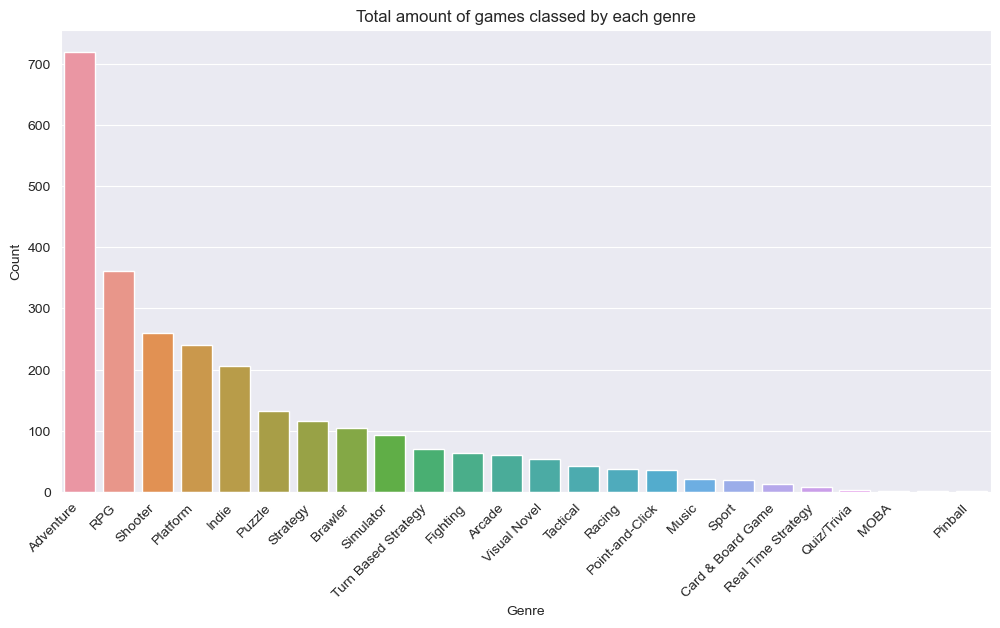

In [24]:
plt.figure(figsize=(12, 6))
sns.set_style('darkgrid')
ax = sns.barplot(x=genre_total.index, y=genre_total.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title('Total amount of games classed by each genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

To continue exploring the effects of Genre on plays and playing time, we instead created a separate data frame which takes the 10 largest Genres by total plays. A large majority of genres have counts of <50 which we deemed statistically too small to be of any major significance to further analysis

In [25]:
popular_genres = dfvg_explode.groupby('Genres')['Plays'].sum().nlargest(10).index
popular_genres_df = dfvg_explode[dfvg_explode['Genres'].isin(popular_genres)]
popular_genres_df.shape

(2304, 10)

Next we created summary statistics for average and total plays and playing time figures for the most popular genres

In [26]:
#summary statistics for ratings by genre
rating_stats = popular_genres_df.groupby('Genres')['Rating'].describe()
#summary and average for plays (completed) stats
plays_stats = popular_genres_df.groupby('Genres')['Plays'].sum()
average_plays = popular_genres_df.groupby('Genres')['Plays'].mean()
summary_plays = popular_genres_df.groupby('Genres')['Plays'].describe()
#summary and average for active playing stats
playing_stats = popular_genres_df.groupby('Genres')['Playing'].sum()
average_playing = popular_genres_df.groupby('Genres')['Playing'].mean()
summary_playing = popular_genres_df.groupby('Genres')['Playing'].describe()

In [27]:
print(plays_stats)
print(average_plays)

Genres
Adventure              3795045.0
Brawler                 527769.0
Indie                   858627.0
Platform               1364070.0
Puzzle                  557897.0
RPG                    1787664.0
Shooter                1608370.0
Simulator               427168.0
Strategy                475639.0
Turn Based Strategy     382484.0
Name: Plays, dtype: float64
Genres
Adventure              5278.226704
Brawler                5074.701923
Indie                  4168.092233
Platform               5660.041494
Puzzle                 4226.492424
RPG                    4951.977839
Shooter                6186.038462
Simulator              4544.340426
Strategy               4100.336207
Turn Based Strategy    5387.098592
Name: Plays, dtype: float64


In [28]:
print(playing_stats)
print(average_playing)

Genres
Adventure              153358.0
Brawler                 25390.0
Indie                   41379.0
Platform                38065.0
Puzzle                  15868.0
RPG                    105586.0
Shooter                 46237.0
Simulator               21744.0
Strategy                21755.0
Turn Based Strategy     20696.0
Name: Playing, dtype: float64
Genres
Adventure              213.293463
Brawler                244.134615
Indie                  200.868932
Platform               157.946058
Puzzle                 120.212121
RPG                    292.481994
Shooter                177.834615
Simulator              231.319149
Strategy               187.543103
Turn Based Strategy    291.492958
Name: Playing, dtype: float64


To visualize these summary statistics we create two plots to show the total playing and plays figures for the most popular genres:

The black bars on top of each bar represent the confidence intervals for the data pertaining to each genre. It make sense that for the most popular genres that confidence bars are longer as it implies greater chance of variation in the data which naturally correlates with a greate number of values. For less popular genres confidence interval bars are smaller.

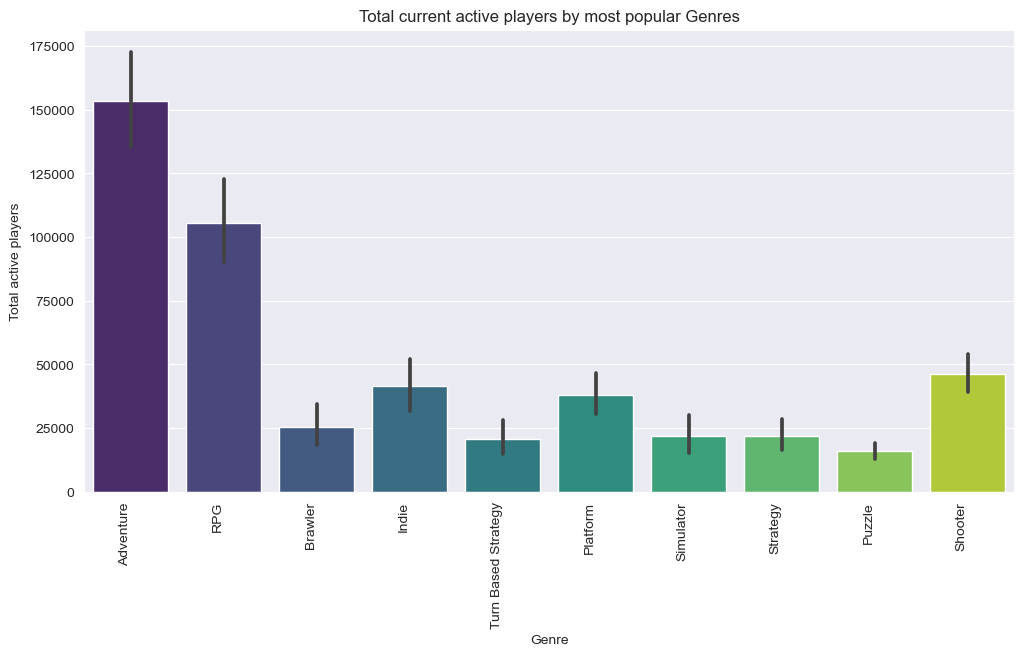

In [29]:
plt.figure(figsize=(12, 6))
sns.set_style('darkgrid')
sns.barplot(data=popular_genres_df, x='Genres', y='Playing', estimator=sum, palette='viridis')
plt.title('Total current active players by most popular Genres')
plt.xlabel('Genre')
plt.ylabel('Total active players')
plt.xticks(rotation=90, ha='right')
plt.show()


From the above plot, Adventure games dominate, having the highest number of current active players followed by RPG games. Indie, Platform and Shooter games maintain fairly similar numbers to each other (between 25000-50000 active players). Remaining genres all have less than 25000 active players. As mentioned earlier smaller genres have smaller confidence interval ranges than genres with high total counts

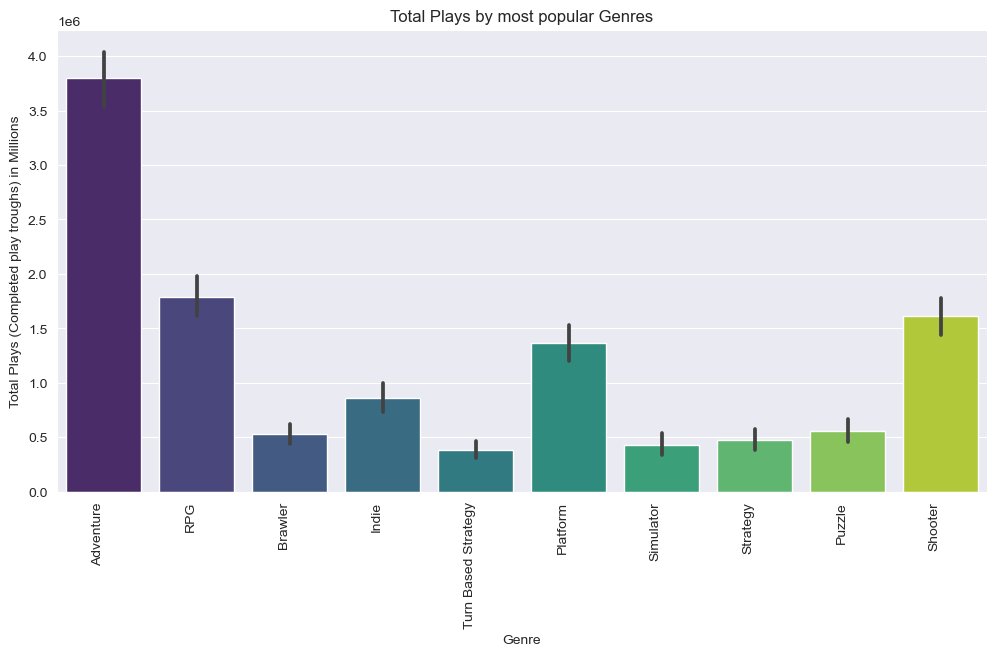

In [30]:
plt.figure(figsize=(12, 6))
sns.set_style('darkgrid')
sns.barplot(data=popular_genres_df, x='Genres', y='Plays', estimator=sum, palette='viridis')
plt.title('Total Plays by most popular Genres')
plt.xlabel('Genre')
plt.ylabel('Total Plays (Completed play troughs) in Millions')
plt.xticks(rotation=90, ha='right')
plt.show()

Similarly for the bar plot showing total plays across all genres, it is once again Adventure games that dominate, followed again by RPG, Platform and Shooter games. The rest of the Genres are once again fairly consistent with one another in terms of size. Indicating a large bias towards games being classed as Adventure in the dataset.

Box plots were employed to visualize the summary statistics we created previously for ratings by genre. The plot below shows that the mean rating across all genres tends to be between 3.5 and 4, Adventure games which is the most populous genre also has the highest spread when it comes to ratings. 

RPG and Shooter games show similar yet slightly smaller ranges in terms of spread. We once again observe on average smaller spread between values when the count of a game is lower. 

In [31]:
print(summary_plays)

                     count         mean          std    min     25%     50%  \
Genres                                                                        
Adventure            719.0  5278.226704  5033.231907    1.0  1600.0  3700.0   
Brawler              104.0  5074.701923  4904.371824  100.0  1600.0  3100.0   
Indie                206.0  4168.092233  4746.793536   16.0  1200.0  2700.0   
Platform             241.0  5660.041494  5305.934519   69.0  2100.0  3800.0   
Puzzle               132.0  4226.492424  4501.759874   48.0  1400.0  3000.0   
RPG                  361.0  4951.977839  5028.820643    1.0  1400.0  3100.0   
Shooter              260.0  6186.038462  5405.654542  100.0  2175.0  4350.0   
Simulator             94.0  4544.340426  5292.948814   61.0  1225.0  3150.0   
Strategy             116.0  4100.336207  4581.022094   16.0  1250.0  2750.0   
Turn Based Strategy   71.0  5387.098592  4909.255792   16.0  1800.0  4300.0   

                        75%      max  
Genres      

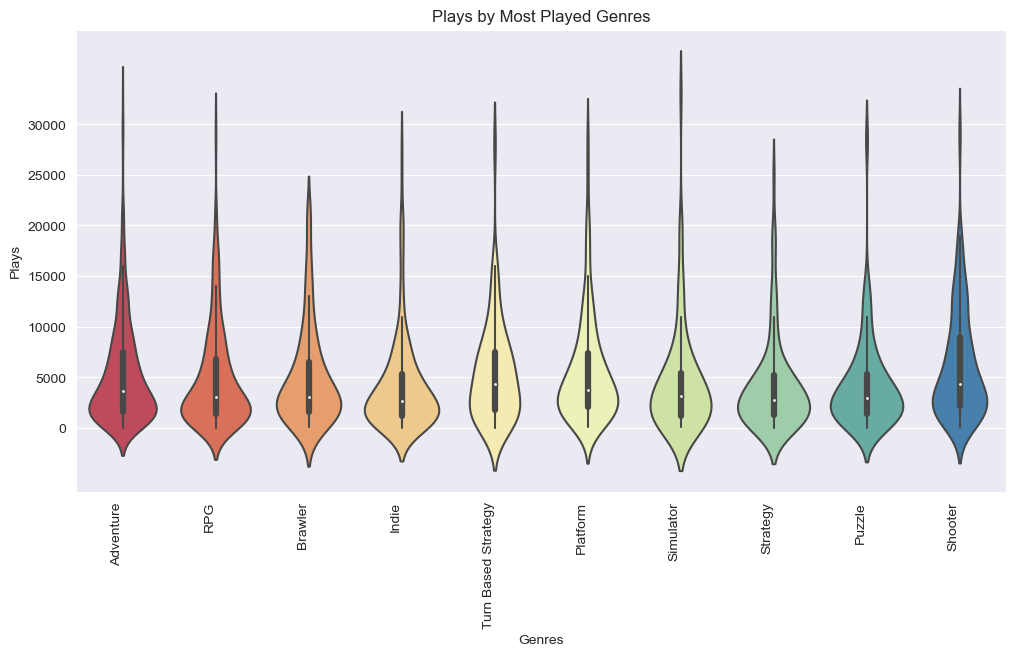

In [32]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=popular_genres_df, x='Genres', y='Plays', palette='Spectral')
plt.title('Plays by Most Played Genres')
plt.xticks(rotation=90, ha='right')
plt.yticks(ticks=[0, 5000, 10000, 15000, 20000, 25000, 30000])
plt.show()


In [39]:
print(summary_playing)

                     count        mean         std  min    25%    50%     75%  \
Genres                                                                          
Adventure            719.0  213.293463  354.996801  0.0  44.00   97.0  218.00   
Brawler              104.0  244.134615  416.544525  2.0  40.75  104.0  270.00   
Indie                206.0  200.868932  364.313665  0.0  36.25   90.0  203.00   
Platform             241.0  157.946058  262.636856  2.0  30.00   75.0  154.00   
Puzzle               132.0  120.212121  149.197754  1.0  31.75   73.0  144.50   
RPG                  361.0  292.481994  449.749579  0.0  65.00  132.0  314.00   
Shooter              260.0  177.834615  246.132446  1.0  37.00   85.0  212.00   
Simulator             94.0  231.319149  400.551185  1.0  41.00  105.0  209.50   
Strategy             116.0  187.543103  292.587568  3.0  39.75   76.5  172.25   
Turn Based Strategy   71.0  291.492958  409.864329  7.0  62.50  129.0  279.00   

                        max

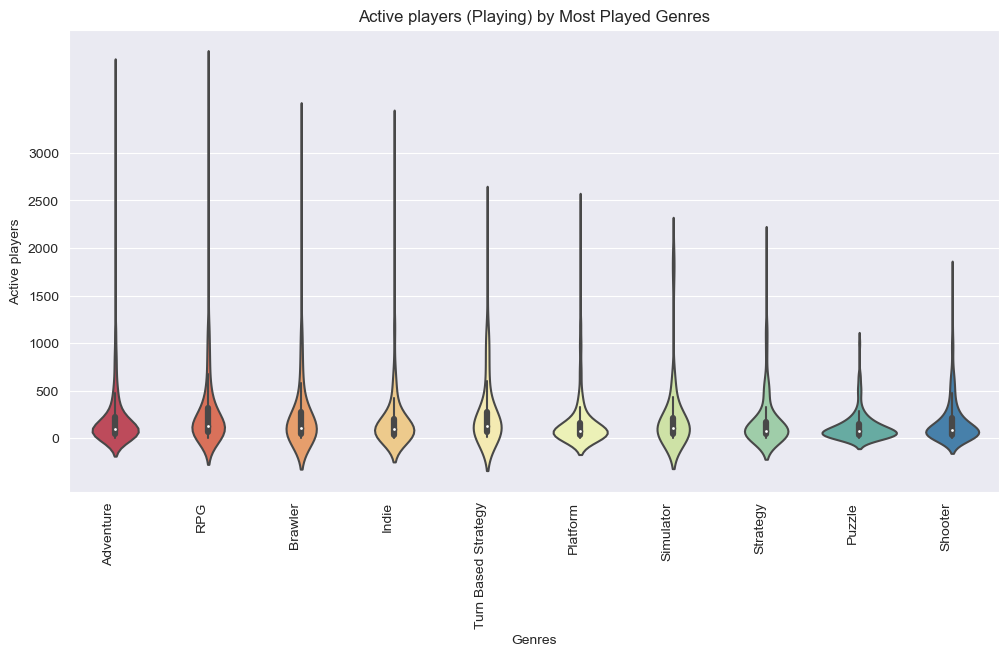

In [33]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=popular_genres_df, x='Genres', y='Playing', palette='Spectral')
plt.title('Active players (''Playing'') by Most Played Genres')
plt.ylabel('Active players')
plt.xticks(rotation=90, ha='right')
plt.yticks(ticks=[0, 500, 1000, 1500, 2000, 2500, 3000])
plt.show()